In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
iris.data.shape

(150, 4)

In [4]:
iris.feature_names
#iris.data

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


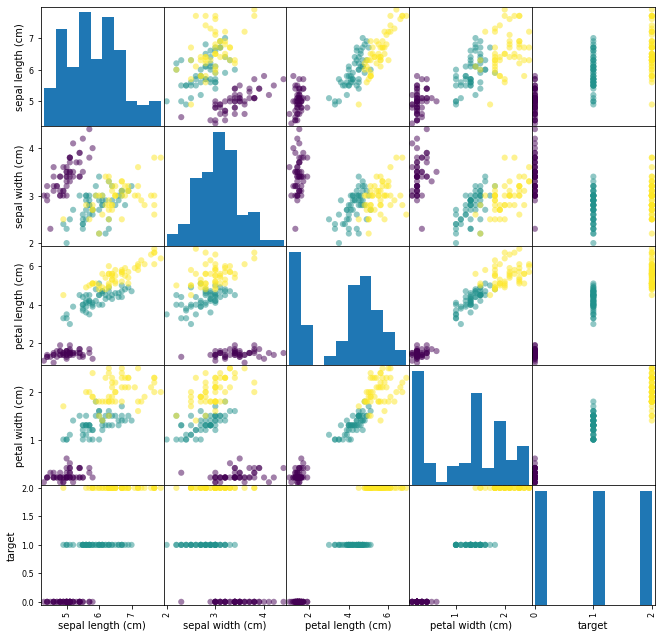

In [8]:
# Visual EDA
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=[11, 11], s=150)
plt.show()

# KNN : K-Nearest Neighbors

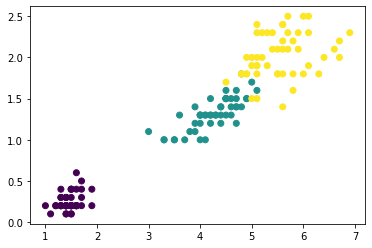

In [10]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:, [2, 3]] #only use petal length and width
y = iris.target
plt.scatter(x[:,0],x[:,1], c=y)
plt.show()

# Fit Data to Model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, metric='minkowski',p=2)
x = iris.data
y = iris.target
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=6)

# Predict

In [12]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
xx = np.array([[5, 3, 1, 0.2]])
yy = knn.predict(xx)
print(yy)

[0]


# Train and test

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=
0.3, random_state=42, stratify=iris.target)

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
y_predict

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2,
       1])

In [17]:
knn.score(x_test, y_test)

0.9777777777777777

# Over Fitting and Under Fitting Testing

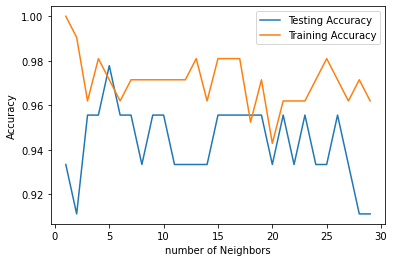

In [21]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    train_accuracy[i] = knn_model.score(x_train, y_train)
    test_accuracy[i] = knn_model.score(x_test, y_test)
    
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('number of Neighbors')
plt.ylabel('Accuracy')
plt.show()